In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
path = 'beneficiarios_ene_jun_2019.csv'
doc = pd.read_csv(path, encoding = 'unicode_escape')
doc.head()

,Número,Donacion,Organo/Tejido,Estatus,Mes/Año de Estatus,Sexo,Fecha Nac,Fecha Registro Comite,Establecimiento,Dependencia,Edo Residencia,Edo Origen,Diagnostico,Grupo Sanguineo,Rh
0,1.0,Cadaver,Córnea,Baja,1/19,Femenino,26/06/1941,17/01/2019,HOSPITAL GENERAL DE ZONA No. 50,Instituto Mexicano del Seguro Social,San Luis Potosí,Aguascalientes,FALLA PRIMARIA DEL INJERTO,O,Positivo
1,2.0,Cadaver,Córnea,Baja,1/19,Femenino,04/09/1958,17/01/2019,HOSPITAL GENERAL DE ZONA No. 50,Instituto Mexicano del Seguro Social,San Luis Potosí,Tabasco,DISTROFIA DE FUCHS,O,Positivo
2,3.0,Cadaver,Córnea,En espera,1/19,Masculino,05/08/1990,17/01/2019,HOSPITAL GENERAL DE ZONA No. 50,Instituto Mexicano del Seguro Social,San Luis Potosí,San Luis Potosí,QUERATOPATIA BULOSA,O,Positivo
3,4.0,Cadaver,Córnea,Trasplante,1/19,Masculino,02/04/1938,07/01/2019,HOSPITAL GENERAL DE ZONA No. 50,Instituto Mexicano del Seguro Social,San Luis Potosí,Jalisco,ULCERA,O,Positivo
4,5.0,Cadaver,Córnea,Trasplante,2/19,Femenino,18/04/1934,17/01/2019,HOSPITAL GENERAL DE ZONA No. 50,Instituto Mexicano del Seguro Social,San Luis Potosí,San Luis Potosí,ULCERA,A,Positivo


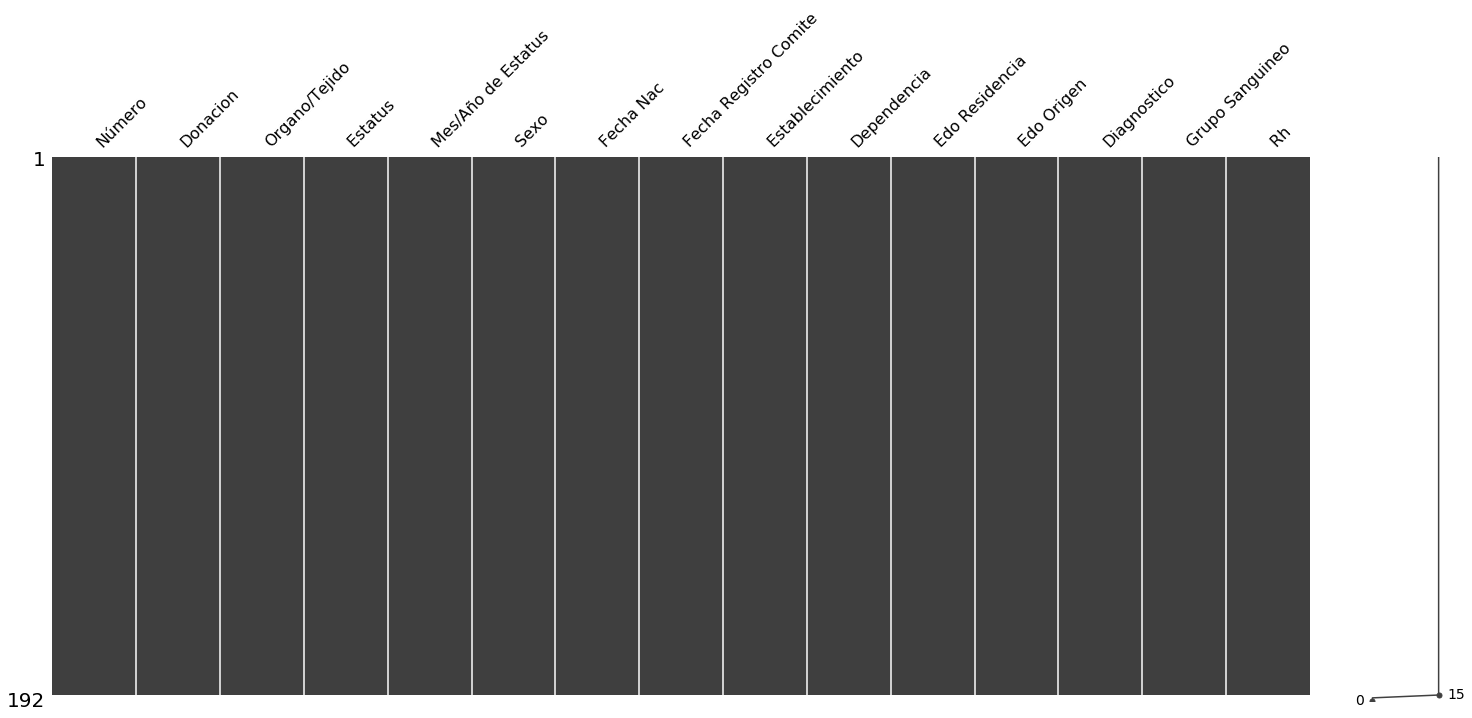

In [3]:
msno.matrix(doc)

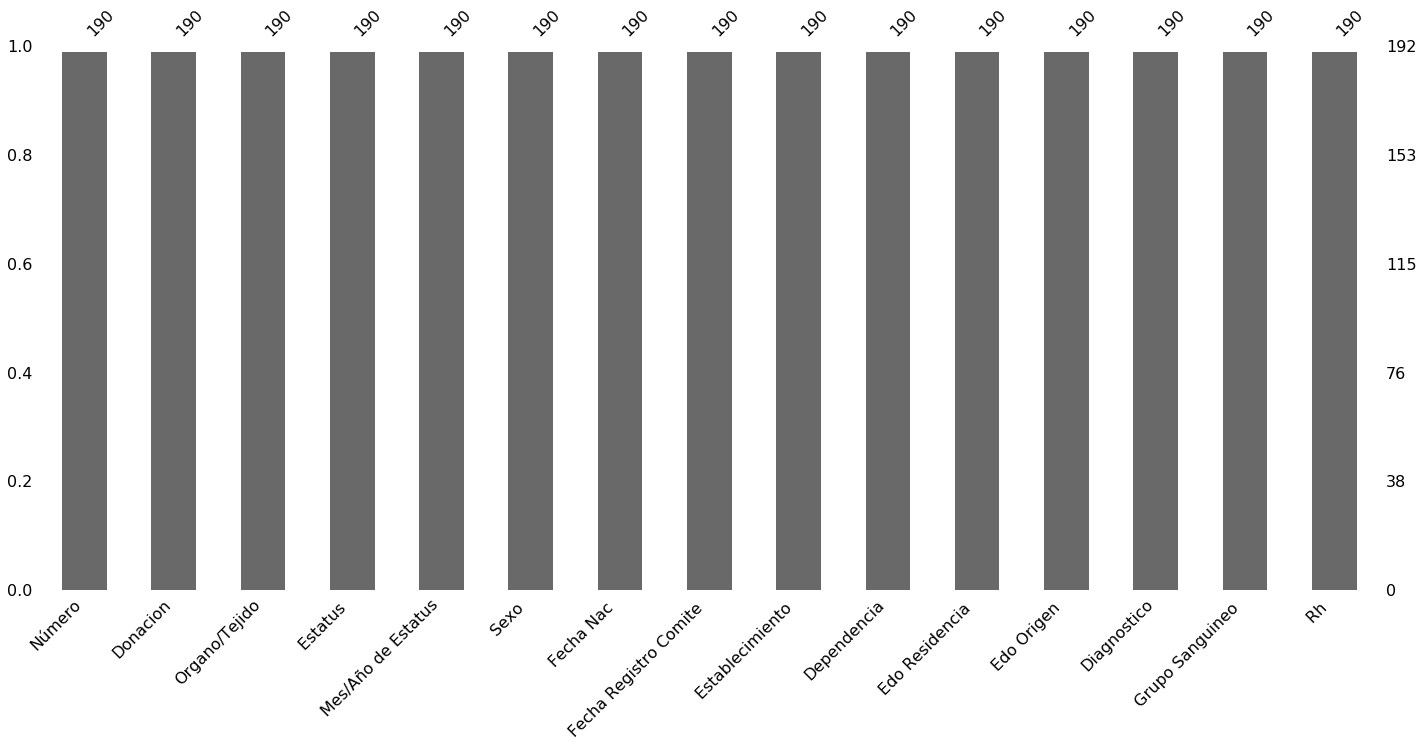

In [4]:
msno.bar(doc)

In [5]:
list(doc["Donacion"].unique())

['Cadaver', 'Vivo', nan]

In [6]:
list(doc['Organo/Tejido'].unique())

['Córnea', 'Riñón', nan]

In [7]:
doc.columns.values.tolist()

['Número',
 'Donacion',
 'Organo/Tejido',
 'Estatus\xa0',
 'Mes/Año de Estatus',
 'Sexo\xa0',
 'Fecha Nac\xa0',
 'Fecha Registro Comite\xa0',
 'Establecimiento\xa0',
 'Dependencia',
 'Edo Residencia\xa0',
 'Edo Origen\xa0',
 'Diagnostico',
 'Grupo Sanguineo\xa0',
 'Rh\xa0']

In [8]:
(doc['Estatus\xa0'].unique())

array(['Baja', 'En espera', 'Trasplante', nan], dtype=object)

In [9]:
(doc['Mes/Año de Estatus'].unique())

array(['1/19', '2/19', '5/19', '3/19', '4/19', '6/19', '7/19', nan],
      dtype=object)

In [10]:
doc['Sexo\xa0'].unique()

array(['Femenino\xa0', 'Masculino\xa0', nan], dtype=object)

In [11]:
doc['Fecha Registro Comite\xa0'].unique()

array(['17/01/2019\xa0', '07/01/2019\xa0', '25/01/2019\xa0',
       '29/01/2019\xa0', '26/01/2019\xa0', '21/01/2019\xa0',
       '30/01/2019\xa0', '15/02/2019\xa0', '12/02/2019\xa0',
       '28/02/2019\xa0', '19/02/2019\xa0', '22/02/2019\xa0',
       '23/02/2019\xa0', '10/02/2017\xa0', '01/02/2019\xa0',
       '11/02/2019\xa0', '07/02/2019\xa0', '13/02/2019\xa0',
       '08/03/2019\xa0', '21/03/2019\xa0', '22/03/2019\xa0',
       '29/03/2019\xa0', '13/03/2019\xa0', '06/03/2019\xa0',
       '11/03/2019\xa0', '15/03/2019\xa0', '05/04/2019\xa0',
       '24/04/2019\xa0', '30/04/2019\xa0', '12/04/2019\xa0',
       '28/04/2017\xa0', '29/04/2019\xa0', '10/04/2019\xa0',
       '26/04/2019\xa0', '03/05/2019\xa0', '07/05/2019\xa0',
       '30/05/2016\xa0', '13/05/2019\xa0', '01/05/2019\xa0',
       '14/05/2019\xa0', '28/05/2018\xa0', '06/05/2019\xa0',
       '08/05/2019\xa0', '15/05/2019\xa0', '17/05/2019\xa0',
       '22/05/2019\xa0', '27/05/2019\xa0', '30/05/2019\xa0',
       '02/05/2019\xa0',

In [12]:
doc['Fecha Registro Comite\xa0'].unique()

array(['17/01/2019\xa0', '07/01/2019\xa0', '25/01/2019\xa0',
       '29/01/2019\xa0', '26/01/2019\xa0', '21/01/2019\xa0',
       '30/01/2019\xa0', '15/02/2019\xa0', '12/02/2019\xa0',
       '28/02/2019\xa0', '19/02/2019\xa0', '22/02/2019\xa0',
       '23/02/2019\xa0', '10/02/2017\xa0', '01/02/2019\xa0',
       '11/02/2019\xa0', '07/02/2019\xa0', '13/02/2019\xa0',
       '08/03/2019\xa0', '21/03/2019\xa0', '22/03/2019\xa0',
       '29/03/2019\xa0', '13/03/2019\xa0', '06/03/2019\xa0',
       '11/03/2019\xa0', '15/03/2019\xa0', '05/04/2019\xa0',
       '24/04/2019\xa0', '30/04/2019\xa0', '12/04/2019\xa0',
       '28/04/2017\xa0', '29/04/2019\xa0', '10/04/2019\xa0',
       '26/04/2019\xa0', '03/05/2019\xa0', '07/05/2019\xa0',
       '30/05/2016\xa0', '13/05/2019\xa0', '01/05/2019\xa0',
       '14/05/2019\xa0', '28/05/2018\xa0', '06/05/2019\xa0',
       '08/05/2019\xa0', '15/05/2019\xa0', '17/05/2019\xa0',
       '22/05/2019\xa0', '27/05/2019\xa0', '30/05/2019\xa0',
       '02/05/2019\xa0',

In [13]:
doc['Establecimiento\xa0'].unique()

array(['HOSPITAL GENERAL DE ZONA No. 50',
       'HOSPITAL LOMAS DE SAN LUIS INTERNACIONAL',
       'HOSPITAL CENTRAL "DR. IGNACIO MORONES PRIETO"',
       'OFTALMOLOGIA POTOSINA AVANZADA S.A. DE C.V',
       'STAR MEDICA, S. A. DE C. V. (HOSPITAL SAN LUIS POTOSI)',
       'LASER SAN LUIS SA DE CV',
       'HOSPITAL LOMAS DE SAN LUIS INTERNACIONAL\xa0', nan], dtype=object)

In [14]:
doc['Dependencia'].unique()

array(['Instituto Mexicano del Seguro Social', 'Privado',
       'Servicios de Salud del Estado', nan], dtype=object)

In [15]:
items = doc['Edo Residencia\xa0'].unique()
items

array(['San Luis Potosí', 'Quintana Roo', 'Zacatecas', 'Guanajuato',
       'Jalisco', 'Guerrero', 'Hidalgo', 'Estado de México',
       'Aguascalientes', 'Querétaro', 'Yucatán', 'Ciudad de México', nan],
      dtype=object)

In [16]:
doc['Edo Origen\xa0'].unique()

array(['Aguascalientes', 'Tabasco', 'San Luis Potosí', 'Jalisco',
       'Ciudad de México', 'Zacatecas', 'Guanajuato', 'Hidalgo',
       'Estado de México', 'Querétaro', 'Yucatán', 'ZAC\xa0',
       'Nuevo León', nan], dtype=object)

In [17]:
doc['Diagnostico'].unique()

array(['FALLA PRIMARIA DEL INJERTO\xa0', 'DISTROFIA DE FUCHS\xa0',
       'QUERATOPATIA BULOSA\xa0', 'ULCERA\xa0', 'QUERATOCONO\xa0',
       'LEUCOMA\xa0', 'DISTROFIA ENDOTELIAL CONGENITA\xa0',
       'QUERATITIS HERPETICA\xa0', 'GLOMERULOPATIA DESCONOCIDA\xa0',
       'ENFERMEDAD POLIQUISTICA\xa0', 'GLOMERULOPATIA SECUNDARIA\xa0',
       'GLOMERULOPATIA PRIMARIA\xa0', 'OTRO\xa0', 'QUEMADURA\xa0',
       'DISTROFIA HEREDITARIA\xa0', nan], dtype=object)

In [18]:
doc['Grupo Sanguineo\xa0'].unique()

array(['O\xa0', 'A\xa0', 'NO APLICA\xa0', 'B\xa0', 'AB\xa0', nan],
      dtype=object)

In [19]:
doc['Grupo Sanguineo\xa0'].unique()

array(['O\xa0', 'A\xa0', 'NO APLICA\xa0', 'B\xa0', 'AB\xa0', nan],
      dtype=object)

In [21]:
encoded_vals = []

for index, row in doc.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [22]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,Quintana Roo,NaN,Jalisco,Zacatecas,Guerrero,Ciudad de México,Yucatán,Hidalgo,Estado de México,Guanajuato,Querétaro,San Luis Potosí,Aguascalientes
0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

,support,itemsets
0,0.828125,(San Luis Potosí)


In [24]:
freq_items.itemsets.unique()

array([frozenset({'San Luis Potosí'})], dtype=object)

In [25]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
